<h1>Vision De Maquina - Articulo</h1>
<h1>Signal and image denoising using wavelet transform</h1>
<h2>Julian Camilo Mendez Corredor</h2>
<br>
<br>

<p>Implementar los 3 metodos para restauracion utilizando la transformada Wavelet</p>

<h1 style="font-size:100%; background-color:rgba(70, 0, 700, 0.2); color:black; text-align:center; line-height : 30px;">24 - mayo - 2017
</h1>


In [2]:
#Importamos las librerias PyWavelets y PyYAWT
#Esta ultima se descarga en http://pyyawt.readthedocs.io/
import pyyawt
import pywt

import cv2
import math
from IPython.display import Image
import numpy as np
from matplotlib import pyplot as plt

#Transformada Onditas
def waveTrans(img, mode='haar', level=1):
    img =  np.float32(img)   
    #img /= 255;
    coeffs=pywt.wavedec2(img, mode, level=level)
    return coeffs

#Inversa Transformada Onditas
def waveTransIn(coeffs, mode='haar'):
    img=pywt.waverec2(coeffs, mode);
    #img *= 255;
    return  img

#Umbralizado Soft implementado por mi
#Recibe coeficientes y umbral
def softCoeff(coeff, tr):
    for i in range(len(coeff)-1):
        for j in range(3):
            for k in range (len(coeff[i+1][j])):
                for l in range (len(coeff[i+1][j])):
                    coeff[i+1][j][k][l]= sign(coeff[i+1][j][k][l]) * (abs(coeff[i+1][j][k][l])-tr)
    for i in range (len(coeff[0])):
        for j in range (len(coeff[0])):
            coeff[0][i][j]= sign(coeff[0][i][j]) * (abs(coeff[0][i][j])-tr)

    return coeff

#Umbralizado Hard implementado por mi
#Recibe coeficientes y umbral
def hardCoeff(coeff, tr):
    for i in range(len(coeff)-1):
        for j in range(3):
            for k in range (len(coeff[i+1][j])):
                for l in range (len(coeff[i+1][j])):
                    if(abs(coeff[i+1][j][k][l])<tr):
                        coeff[i+1][j][k][l]= 0
    for i in range (len(coeff[0])):
        for j in range (len(coeff[0])):
            if(abs(coeff[0][i][j])<tr):
                        coeff[0][i][j]= 0
    return coeff

#Umbralizado Soft de PyWavelets
#Recibe coeficientes y umbral
def softWave(coeff, tr):
    for i in range(len(coeff)):
        coeff[i]=pywt.threshold(coeff[i], tr, 'soft')
    return coeff

#Umbralizado Hard de PyWavelets
#Recibe coeficientes y umbral
def hardWave(coeff, tr):
    for i in range(len(coeff)):
        coeff[i]=pywt.threshold(coeff[i], tr, 'hard')
    return coeff

#1 si es positivo, -1 si es negativo
def sign(num):
    if(num>0):
        return 1
    elif(num<0):
        return -1
    else:
        return 0;
    
#Determinacion del umbral
#Recibe la matriz de ruido y uno de los 3 metodos
def thselect2D(data,mode):
    return pyyawt.thselect(list(np.array(data).reshape(-1,)),mode)
    

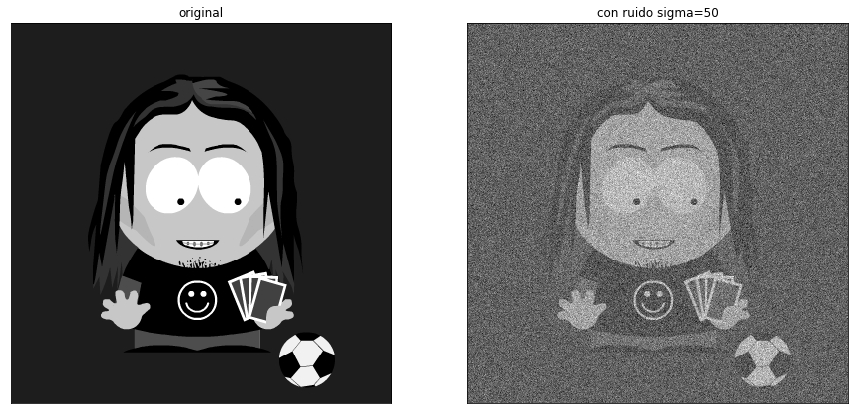

In [7]:
#2 imagenes de prueba
img2 = cv2.imread('Ej/test.jpg',0)
img1 = cv2.imread('Ej/example3.jpg',0)
size=len(img1)

#Iniciamos matriz con ruido gaussiano
gaussian_noise = np.zeros((size, size))
Sigma=50;

#Tipo de ondita
mode="haar"

#Suma de imagen y el ruido
Noised=img1 + cv2.randn(gaussian_noise,128,Sigma);

#3 metodos de elegir el umbral
rig=Sigma*thselect2D(cv2.randn(gaussian_noise,0,1),'rigrsure')
mini=Sigma*thselect2D(cv2.randn(gaussian_noise,0,1),'minimaxi')
Uni=Sigma*(math.sqrt(2*np.log(size*size)))

#Se va a observar la imagen original y la imagen con ruido
plt.figure(1,figsize=(15,15))
plt.subplot(121), plt.imshow(img1,cmap='gray')
plt.title('original'), plt.xticks([]),plt.yticks([])

plt.subplot(122), plt.imshow(Noised,cmap='gray')
plt.title('con ruido sigma=50'), plt.xticks([]),plt.yticks([])
plt.show()


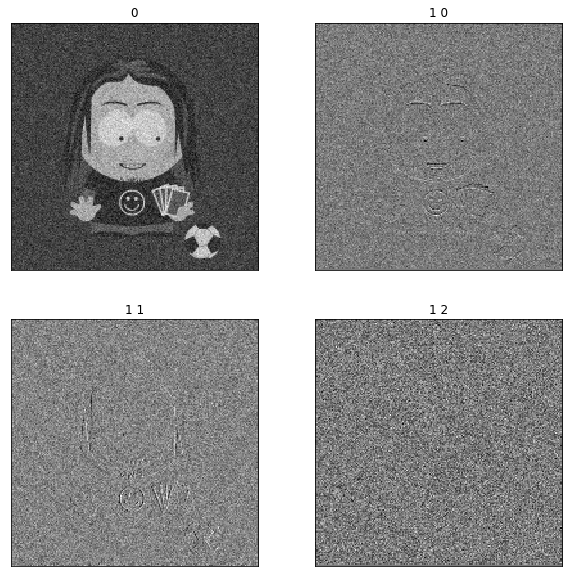

In [8]:
#Transformada Wavelets para la imagen con ruido
#Se elige 1 nivel de descomposicion
coeff=waveTrans(Noised,mode,1)

#Se va a observar la descomposicion de la imagen con ruido
plt.figure(1,figsize=(10,10))
plt.subplot(221), plt.imshow(coeff[0],cmap='gray')
plt.title('0'), plt.xticks([]),plt.yticks([])

plt.subplot(222), plt.imshow(coeff[1][0],cmap='gray')
plt.title('1 0'), plt.xticks([]),plt.yticks([])

plt.subplot(223), plt.imshow(coeff[1][1],cmap='gray')
plt.title('1 1'), plt.xticks([]),plt.yticks([])


plt.subplot(224), plt.imshow(coeff[1][2],cmap='gray')
plt.title('1 2'), plt.xticks([]),plt.yticks([])
plt.show()

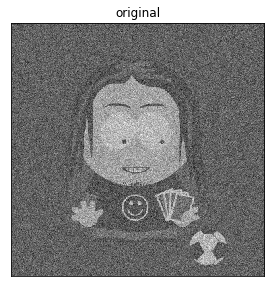

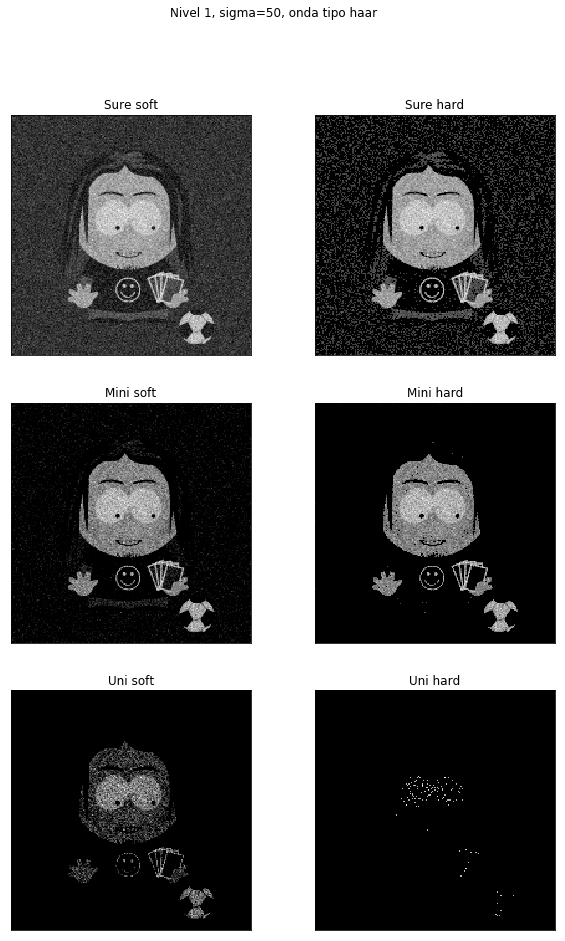

In [9]:
#Transformada inversa usando Metodo Riguroso (soft y hard)
SureSoft=waveTransIn(softWave(coeff,rig),mode)
SureHard=waveTransIn(hardWave(coeff,rig),mode)

#Transformada inversa usando Metodo Minimax (soft y hard)
MiniSoft=waveTransIn(softWave(coeff,mini),mode)
MiniHard=waveTransIn(hardWave(coeff,mini),mode)

#Transformada inversa usando Metodo Universal (soft y hard)
UniSoft=waveTransIn(softWave(coeff,Uni),mode)
UniHard=waveTransIn(hardWave(coeff,Uni),mode)


#Se observa imagen con ruido y todas sus restauraciones
plt.figure(2,figsize=(10,10))
plt.subplot(121), plt.imshow(Noised,cmap='gray')
plt.title('original'), plt.xticks([]),plt.yticks([])


plt.figure(3,figsize=(10,15))
plt.suptitle('Nivel 1, sigma=50, onda tipo haar')
plt.subplot(321), plt.imshow(SureSoft,cmap='gray')
plt.title('Sure soft'), plt.xticks([]),plt.yticks([])
plt.subplot(322), plt.imshow(SureHard,cmap='gray')
plt.title('Sure hard'), plt.xticks([]),plt.yticks([])
plt.subplot(323), plt.imshow(MiniSoft,cmap='gray')
plt.title('Mini soft'), plt.xticks([]),plt.yticks([])
plt.subplot(324), plt.imshow(MiniHard,cmap='gray')
plt.title('Mini hard'), plt.xticks([]),plt.yticks([])
plt.subplot(325), plt.imshow(UniSoft,cmap='gray')
plt.title('Uni soft'), plt.xticks([]),plt.yticks([])
plt.subplot(326), plt.imshow(UniHard,cmap='gray')
plt.title('Uni hard'), plt.xticks([]),plt.yticks([])

plt.show()




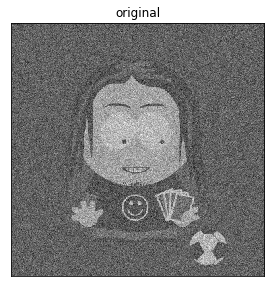

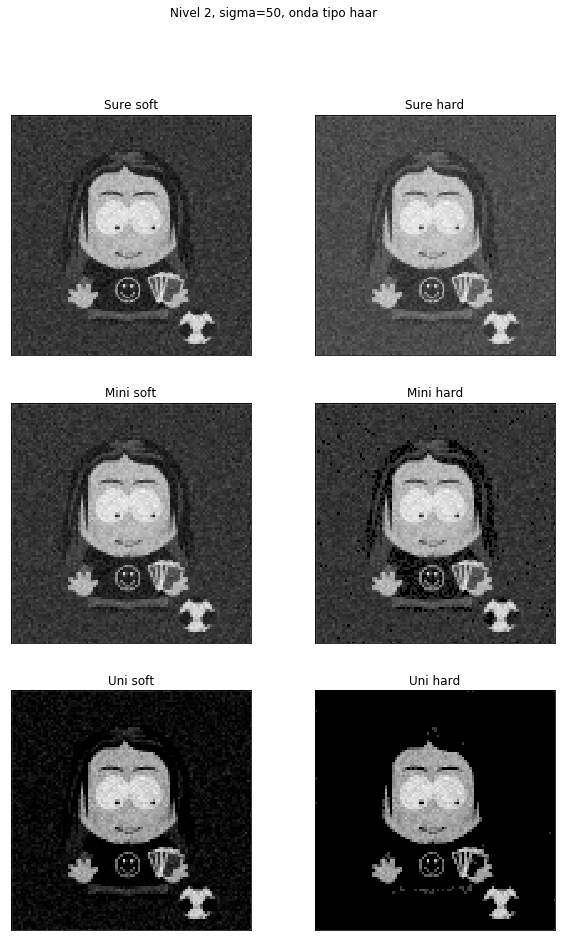

In [10]:
#Prueba para nivel de descomposicion 2
coeff=waveTrans(Noised,mode,2)
SureSoft=waveTransIn(softWave(coeff,rig),mode)
SureHard=waveTransIn(hardWave(coeff,rig),mode)
MiniSoft=waveTransIn(softWave(coeff,mini),mode)
MiniHard=waveTransIn(hardWave(coeff,mini),mode)
UniSoft=waveTransIn(softWave(coeff,Uni),mode)
UniHard=waveTransIn(hardWave(coeff,Uni),mode)



plt.figure(2,figsize=(10,10))
plt.subplot(121), plt.imshow(Noised,cmap='gray')
plt.title('original'), plt.xticks([]),plt.yticks([])


plt.figure(3,figsize=(10,15))
plt.suptitle('Nivel 2, sigma=50, onda tipo haar')
plt.subplot(321), plt.imshow(SureSoft,cmap='gray')
plt.title('Sure soft'), plt.xticks([]),plt.yticks([])
plt.subplot(322), plt.imshow(SureHard,cmap='gray')
plt.title('Sure hard'), plt.xticks([]),plt.yticks([])
plt.subplot(323), plt.imshow(MiniSoft,cmap='gray')
plt.title('Mini soft'), plt.xticks([]),plt.yticks([])
plt.subplot(324), plt.imshow(MiniHard,cmap='gray')
plt.title('Mini hard'), plt.xticks([]),plt.yticks([])
plt.subplot(325), plt.imshow(UniSoft,cmap='gray')
plt.title('Uni soft'), plt.xticks([]),plt.yticks([])
plt.subplot(326), plt.imshow(UniHard,cmap='gray')
plt.title('Uni hard'), plt.xticks([]),plt.yticks([])

plt.show()



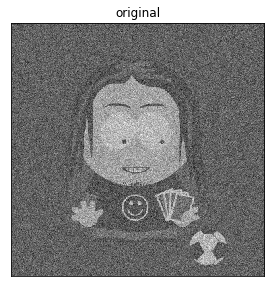

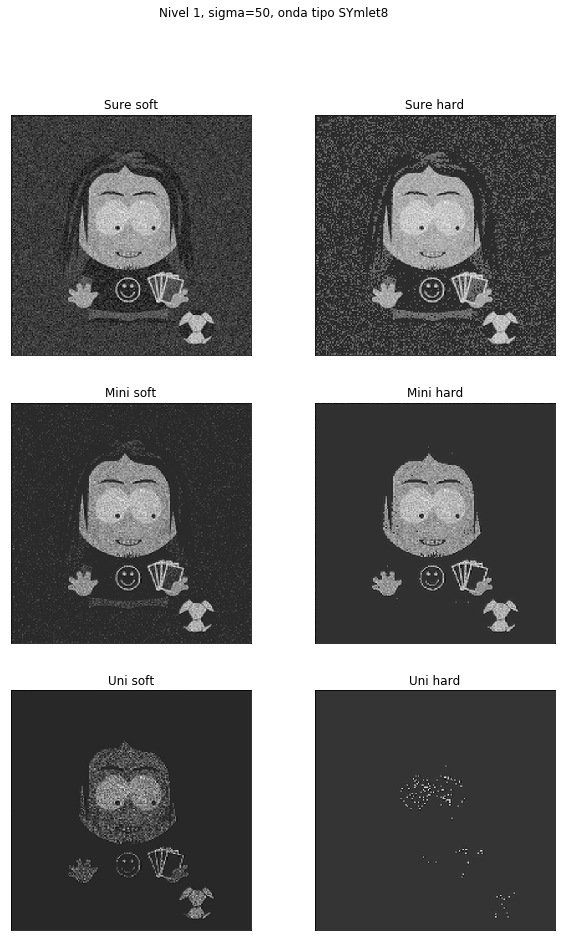

In [11]:
#Prueba para tipo de onda Symlet8
mode='sym8'
coeff=waveTrans(Noised,mode,1)
SureSoft=waveTransIn(softWave(coeff,rig),mode)
SureHard=waveTransIn(hardWave(coeff,rig),mode)
MiniSoft=waveTransIn(softWave(coeff,mini),mode)
MiniHard=waveTransIn(hardWave(coeff,mini),mode)
UniSoft=waveTransIn(softWave(coeff,Uni),mode)
UniHard=waveTransIn(hardWave(coeff,Uni),mode)



plt.figure(2,figsize=(10,10))
plt.subplot(121), plt.imshow(Noised,cmap='gray')
plt.title('original'), plt.xticks([]),plt.yticks([])


plt.figure(3,figsize=(10,15))
plt.suptitle('Nivel 1, sigma=50, onda tipo SYmlet8')
plt.subplot(321), plt.imshow(SureSoft,cmap='gray')
plt.title('Sure soft'), plt.xticks([]),plt.yticks([])
plt.subplot(322), plt.imshow(SureHard,cmap='gray')
plt.title('Sure hard'), plt.xticks([]),plt.yticks([])
plt.subplot(323), plt.imshow(MiniSoft,cmap='gray')
plt.title('Mini soft'), plt.xticks([]),plt.yticks([])
plt.subplot(324), plt.imshow(MiniHard,cmap='gray')
plt.title('Mini hard'), plt.xticks([]),plt.yticks([])
plt.subplot(325), plt.imshow(UniSoft,cmap='gray')
plt.title('Uni soft'), plt.xticks([]),plt.yticks([])
plt.subplot(326), plt.imshow(UniHard,cmap='gray')
plt.title('Uni hard'), plt.xticks([]),plt.yticks([])

plt.show()

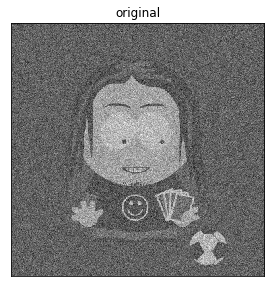

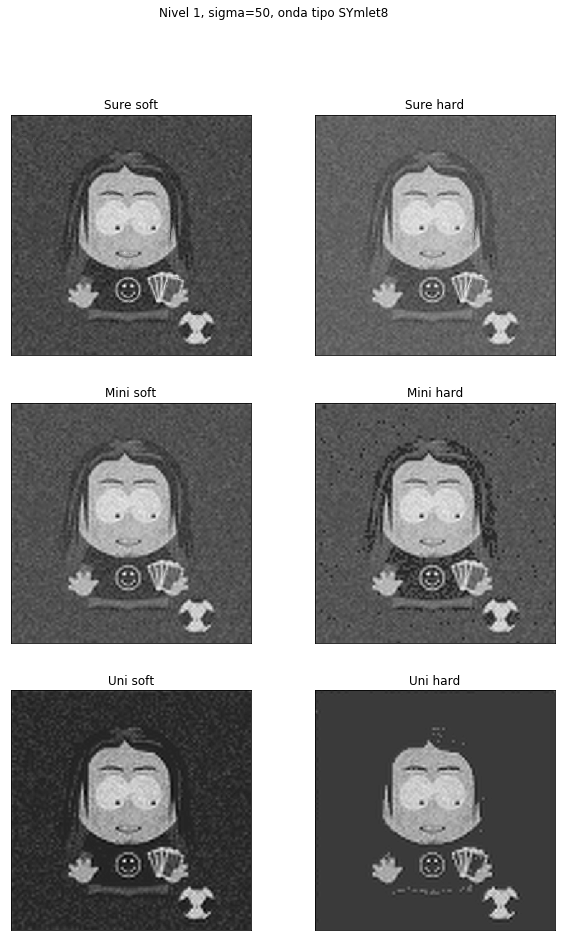

In [12]:
#Prueba para tipo de onda Symlet8 y nivel de descomposicion 2
mode='sym8'
coeff=waveTrans(Noised,mode,2)
SureSoft=waveTransIn(softWave(coeff,rig),mode)
SureHard=waveTransIn(hardWave(coeff,rig),mode)
MiniSoft=waveTransIn(softWave(coeff,mini),mode)
MiniHard=waveTransIn(hardWave(coeff,mini),mode)
UniSoft=waveTransIn(softWave(coeff,Uni),mode)
UniHard=waveTransIn(hardWave(coeff,Uni),mode)



plt.figure(2,figsize=(10,10))
plt.subplot(121), plt.imshow(Noised,cmap='gray')
plt.title('original'), plt.xticks([]),plt.yticks([])


plt.figure(3,figsize=(10,15))
plt.suptitle('Nivel 1, sigma=50, onda tipo SYmlet8')
plt.subplot(321), plt.imshow(SureSoft,cmap='gray')
plt.title('Sure soft'), plt.xticks([]),plt.yticks([])
plt.subplot(322), plt.imshow(SureHard,cmap='gray')
plt.title('Sure hard'), plt.xticks([]),plt.yticks([])
plt.subplot(323), plt.imshow(MiniSoft,cmap='gray')
plt.title('Mini soft'), plt.xticks([]),plt.yticks([])
plt.subplot(324), plt.imshow(MiniHard,cmap='gray')
plt.title('Mini hard'), plt.xticks([]),plt.yticks([])
plt.subplot(325), plt.imshow(UniSoft,cmap='gray')
plt.title('Uni soft'), plt.xticks([]),plt.yticks([])
plt.subplot(326), plt.imshow(UniHard,cmap='gray')
plt.title('Uni hard'), plt.xticks([]),plt.yticks([])

plt.show()